# **Población mundial: Estimación y contraste de hipótesis**

**Objetivo**

El objetivo de este proyecto es utilizar inferencia estadística para estimar y constrastar hipótesis.


**1) Inferencia estadística**

Antes de ir de lleno a la práctica, es necesario introducirnos en los aspectos teóricos que nos permitirán tanto entender el proceso como poder analizar los resultados.

La inferencia estadística es una rama de la estadística trabaja con una muestra de la población con el objetivo de obtener generalizaciones y conclusiones sobre esa población.

Así, la estadística inferencial infiere las propiedades de una población se  mediante la estimación y el contraste de hipótesis.


Para ahondar más en la estimación y en el contraste de hipótesis, se tomará como base el contenido brindado por la profesora Lucileima Rosales, relatora del Bootcamp "Fundamentos de análisis de datos" y experta en estadística.

**1.1) Estimación**

En estadística, la estimación es el procedimiento mediante el cual se busca conocer el valor de un parámetro poblacional (como la media o la proporción), utilizando los datos disponibles de una muestra representativa.

Existen dos tipos principales de estimación, que veremos a continuación:



**1.1.1) Estimación puntual**

Consiste en utilizar un único valor calculado a partir de la muestra para estimar el parámetro poblacional.

Por ejemplo:

La media muestral (x_barra) se usa para estimar la media poblacional 𝜇.


**1.1.2)Estimación por intervalo**

Se establece un rango de valores (intervalo) dentro del que se espera encontrar el parámetro de la población. Esto, con un determinado nivel de confianza, ya sea 90%, 95% o 99%.

De acuerdo a José Francisco López de Economipedia.com,

"El contraste de hipótesis es un tipo de modelo utilizado en inferencia estadística cuyo objetivo es comprobar si una estimación se adapta a los valores poblacionales. En palabras menos abstractas, el objetivo de los métodos de contraste de hipótesis es verificar si una estimación se adapta a la realidad de forma ‘fiable’."

"En todo contraste de hipótesis existen dos supuestos. La hipótesis nula (H0) que recoge la idea de que una variable tiene un valor predeterminado, y la hipótesis alternativa(H1), que es la que se acepta cuando se rechaza la hipótesis nula (H0)."

(Extraído de https://economipedia.com/definiciones/contraste-de-hipotesis.html)

**2) Descripción de la base de datos**

Ahora que ya revisamos de forma muy introductoria la teoría de la inferencia estadística, pasaremos a poner en práctica la estimación y contraste de hipótesis a través de python.

Para el cumplimiento del objetivo, se utiliza una base de datos sobre la población mundial. Ésta se puede obtener en la plataforma Kaggle, en el enlace que sigue:

https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

**2.1) Glosario del conjunto de datos**

* Rank: Lugar en el ranking por población.
* CCA3: Código de país/territorios de 3 dígitos.
* Country/Territories: País/territorios.
* Capital: Capital.
* Continent: Continente.
* 2022 Population: Población del país/territorios en el año 2022.
* 2020 Population: Población del país/territorios en el año 2020.
* 2015 Population: Población del país/territorios en el año 2015.
* 2010 Population: Población del país/territorios en el año 2010.
* 2000 Population: Población del país/territorios en el año 2000.
* 1990 Population: Población del país/territorios en el año 1990.
* 1980 Population: Población del país/territorios en el año 1980.
* 1970 Population: Población del país/territorios en el año 1970.
* Area (km²): Tamaño del área del país/territorios en kilómetros cuadrados.
* Density (per km²): Densidad de población por kilómetro cuadrado.
* Growth Rate: Tasa de crecimiento poblacional por país/territorios.
* World Population Percentage: El porcentaje de población por cada país/territorios.

**3) Carga del conjunto de datos**

Una vez descargada la basse de datos en el enlace https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset, la cargaremos con el siguiente código:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving World_population.csv to World_population (1).csv


**4) Lectura del conjunto de datos**

Ahora leemos el archivo csv que acabamos de cargar.

In [ ]:
#Importar librerías
import pandas as pd # Librería para la manipulación y análisis de datos (tablas, CSV, Excel, SQL, entre otros.)
import numpy as np # Librería para el cálculo numérico eficiente y manejo de arreglos/matrices
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
#Para archivos almacenados en formato CSV: pd.read_csv
#df objeto del tipo DataFrame

# Cargar datos
df = pd.read_csv("world_population.csv")
df.columns = df.columns.str.strip()  # Quita espacios al inicio y final
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


**5) Intervalos de confianza**

Ahora pasamos a la estadística propiamente tal, tomando el conjunto de datos sobre población mundial para ejecutar lo revisado hasta acá.

A continuación se calcula el intervalo de confianza para la media de tres variables:

* Población en el año 2022

* Densidad (por km²)

* Tasa de crecimiento

**5.1) Intervalo de Confianza — Media - Población en el año 2022**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('World_population.csv')
Population_2022 = df['2022 Population'].dropna()
n = len(Population_2022)
xbar = Population_2022.mean()
s = Population_2022.std(ddof=1)
alpha = 0.05
df_res = n - 1
t_crit = stats.t.ppf(1 - alpha/2, df_res)
se = s / np.sqrt(n)
ci = (xbar - t_crit * se, xbar + t_crit * se)

print(f"Media muestral = {xbar:.2f} habitantes")
print(f"95% CI = [{ci[0]:.2f}, {ci[1]:.2f}] habitantes")

Media muestral = 34074414.71 habitantes
95% CI = [16459467.30, 51689362.12] habitantes


**5.2) Intervalo de Confianza — Media - Densidad (por km²)**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('World_population.csv')
Density = df['Density (per km²)'].dropna()
n = len(Density)
xbar = Density.mean()
s = Density.std(ddof=1)
alpha = 0.05
df_res = n - 1
t_crit = stats.t.ppf(1 - alpha/2, df_res)
se = s / np.sqrt(n)
ci = (xbar - t_crit * se, xbar + t_crit * se)

print(f"Media muestral = {xbar:.2f} por km²")
print(f"95% CI = [{ci[0]:.2f}, {ci[1]:.2f}] por km²")

Media muestral = 452.13 por km²
95% CI = [186.02, 718.23] por km²


**5.3) Intervalo de Confianza — Media - Tasa de crecimiento**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('World_population.csv')
Growth_rate = df['Growth Rate'].dropna()
n = len(Growth_rate)
xbar = Growth_rate.mean()
s = Growth_rate.std(ddof=1)
alpha = 0.05
df_res = n - 1
t_crit = stats.t.ppf(1 - alpha/2, df_res)
se = s / np.sqrt(n)
ci = (xbar - t_crit * se, xbar + t_crit * se)

print(f"Media muestral = {xbar:.2f}")
print(f"95% CI = [{ci[0]:.2f}, {ci[1]:.2f}]")

Media muestral = 1.01
95% CI = [1.01, 1.01]


**6) Pruebas de Hipótesis**

A continuación se realiza la prueba de hipótesis para la media de las tres variables trabajadas en el apartado anterior.

* Población en el año 2022

* Densidad (por km²)

* Tasa de crecimiento



**6.1) Prueba de Hipótesis — Media - Población en el año 2022**

In [ ]:
import numpy as np
from scipy import stats

# Supuesto valor poblacional (por ejemplo, se dice que la edad promedio es 30 años)
mu0 = 34074414.71

# Estadísticos muestrales
xbar = Population_2022.mean()        # media muestral
s = Population_2022.std(ddof=1)      # desviación estándar muestral
n = len(Population_2022)             # tamaño de muestra
alpha = 0.05              # nivel de significancia

# Hipótesis:
# H0: μ = 30  (la edad promedio de los pasajeros es igual a 30 años)
# H1: μ ≠ 30  (la edad promedio de los pasajeros es diferente a 30 años)

# Estadístico t
t_stat = (xbar - mu0) / (s / np.sqrt(n))

# Valor crítico bilateral
tcrit = stats.t.ppf(1 - alpha / 2, df=n - 1)

# p-valor bilateral
p_val = 2 * (1 - stats.t.cdf(abs(t_stat), df=n - 1))

# Resultados
print(f"t‑estadístico = {t_stat:.3f}, t_crítico = ±{tcrit:.3f}, p‑valor = {p_val:.3f}")
print("Rechazar H0" if abs(t_stat) > tcrit else "No rechazar H0")

t‑estadístico = -0.000, t_crítico = ±1.970, p‑valor = 1.000
No rechazar H0


**Gráfico**

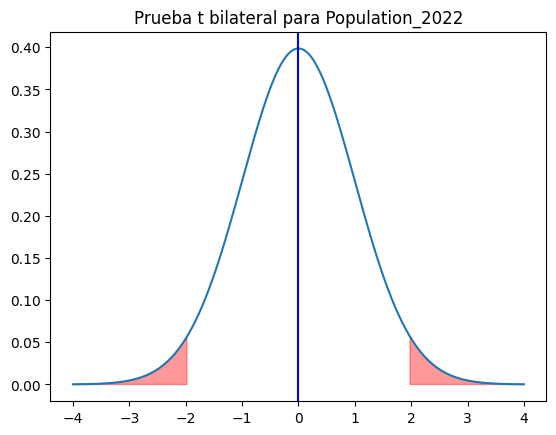

In [ ]:
x = np.linspace(-4,4,500)
y = stats.t.pdf(x, df=n-1)
plt.plot(x, y)
plt.fill_between(x, y, where=(x > tcrit) | (x < -tcrit), color='red', alpha=0.4)
plt.axvline(t_stat, color='blue')
plt.title("Prueba t bilateral para Population_2022")
plt.show()

**6.2) Prueba de Hipótesis — Media - Densidad (por km²)**

In [ ]:
import numpy as np
from scipy import stats

# Supuesto valor poblacional (por ejemplo, se dice que la edad promedio es 30 años)
mu0 = 452.13

# Estadísticos muestrales
xbar = Density.mean()        # media muestral
s = Density.std(ddof=1)      # desviación estándar muestral
n = len(Density)             # tamaño de muestra
alpha = 0.05              # nivel de significancia

# Hipótesis:
# H0: μ = 30  (la edad promedio de los pasajeros es igual a 30 años)
# H1: μ ≠ 30  (la edad promedio de los pasajeros es diferente a 30 años)

# Estadístico t
t_stat = (xbar - mu0) / (s / np.sqrt(n))

# Valor crítico bilateral
tcrit = stats.t.ppf(1 - alpha / 2, df=n - 1)

# p-valor bilateral
p_val = 2 * (1 - stats.t.cdf(abs(t_stat), df=n - 1))

# Resultados
print(f"t‑estadístico = {t_stat:.3f}, t_crítico = ±{tcrit:.3f}, p‑valor = {p_val:.3f}")
print("Rechazar H0" if abs(t_stat) > tcrit else "No rechazar H0")

t‑estadístico = -0.000, t_crítico = ±1.970, p‑valor = 1.000
No rechazar H0


**Gráfico**

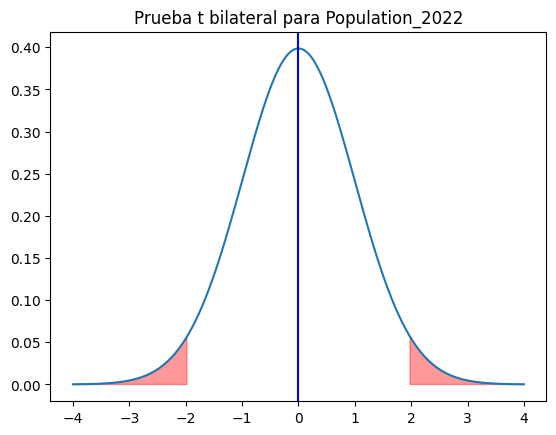

In [ ]:
x = np.linspace(-4,4,500)
y = stats.t.pdf(x, df=n-1)
plt.plot(x, y)
plt.fill_between(x, y, where=(x > tcrit) | (x < -tcrit), color='red', alpha=0.4)
plt.axvline(t_stat, color='blue')
plt.title("Prueba t bilateral para Population_2022")
plt.show()

**6.3) Prueba de Hipótesis — Media - Tasa de crecimiento**


In [ ]:
import numpy as np
from scipy import stats

# Supuesto valor poblacional (por ejemplo, se dice que la edad promedio es 30 años)
mu0 = 1.01

# Estadísticos muestrales
xbar = Growth_rate.mean()        # media muestral
s = Growth_rate.std(ddof=1)      # desviación estándar muestral
n = len(Growth_rate)             # tamaño de muestra
alpha = 0.05              # nivel de significancia

# Hipótesis:
# H0: μ = 30  (la edad promedio de los pasajeros es igual a 30 años)
# H1: μ ≠ 30  (la edad promedio de los pasajeros es diferente a 30 años)

# Estadístico t
t_stat = (xbar - mu0) / (s / np.sqrt(n))

# Valor crítico bilateral
tcrit = stats.t.ppf(1 - alpha / 2, df=n - 1)

# p-valor bilateral
p_val = 2 * (1 - stats.t.cdf(abs(t_stat), df=n - 1))

# Resultados
print(f"t‑estadístico = {t_stat:.3f}, t_crítico = ±{tcrit:.3f}, p‑valor = {p_val:.3f}")
print("Rechazar H0" if abs(t_stat) > tcrit else "No rechazar H0")

t‑estadístico = -0.483, t_crítico = ±1.970, p‑valor = 0.630
No rechazar H0


**Gráfico**

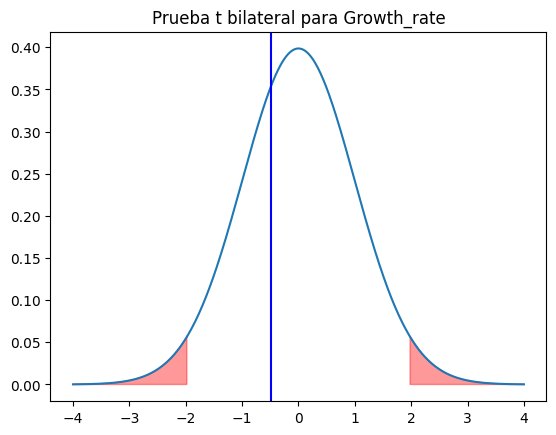

In [ ]:
x = np.linspace(-4,4,500)
y = stats.t.pdf(x, df=n-1)
plt.plot(x, y)
plt.fill_between(x, y, where=(x > tcrit) | (x < -tcrit), color='red', alpha=0.4)
plt.axvline(t_stat, color='blue')
plt.title("Prueba t bilateral para Growth_rate")
plt.show()

**7) Conclusión**

Este proyecto presenta las bases para estimar y contrastar hipótesis a través de Python y ocupando como ejemplo una base de datos de la población mundial.

De esta forma, se estimó y contrastó hipótesis para tres variables del conjunto de datos.

Con ello se pudo inferir estadísticamente características poblacionales a partir de muestras.

En una próxima fase de este proyecto, se profundizará en las interpretaciones de cada caso. Por ahora, se sientan las bases de este aprendizaje.